<a href="https://colab.research.google.com/github/nannthd/project_AIEngineer/blob/main/Drug_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FpJxukTY5ewqBW8qVPzH")
project = rf.workspace("ka05").project("50_class-4")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
%cat {dataset.location}/data.yaml

In [5]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
%cat {dataset.location}/data.yaml

# Load model

In [ ]:
# Load a model
model = YOLO("/content/drive/MyDrive/drug/model.pt")
model.names

##predict & save


0: 640x640 1 Amlopine_10mg, 569.1ms
Speed: 2.6ms preprocess, 569.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


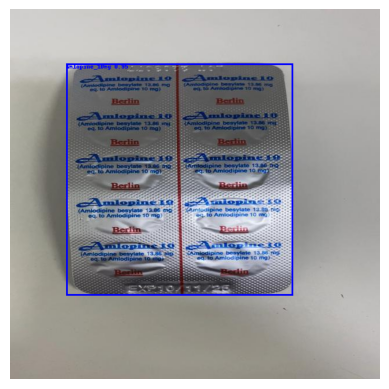

Class: Amlopine_10mg, Confidence: 0.95, Bbox: [97.19929504394531, 94.10400390625, 489.50714111328125, 495.60980224609375]
No unknown classes detected.


In [30]:
import os
import torch
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("/content/drive/MyDrive/drug/model.pt")

# Load image
img_path = '/content/50_Class-4-2/test/images/Amlopine-10-mg_MOV-0004_jpg.rf.5f5c4e0fe2bec2a5bb6e17c75a63357a.jpg'
image = Image.open(img_path)

# Perform prediction
results = model.predict(image)

# Prepare to save unknown class images
save_dir = '/content/unknown_class_images'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, os.path.basename(img_path))

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
unknown_class_detected = False

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        label = result.names[int(box.cls)]
        confidence = float(box.conf)  # Convert tensor to float
        if confidence <= 0.5:
            draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=3)
            draw.text((x1, y1), f"Unknown Class {confidence:.2f}", fill="red")
            unknown_class_detected = True
        else:
            draw.rectangle(((x1, y1), (x2, y2)), outline="blue", width=3)  # Draw with blue outline for high confidence
            draw.text((x1, y1), f"{label} {confidence:.2f}", fill="blue")

# Save image if unknown class was detected
if unknown_class_detected:
    image.save(save_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Print out the results
for result in results:
    for box in result.boxes:
        if float(box.conf) <= 0.5:
            print(f"Unknown Class, Confidence: {float(box.conf):.2f}, Bbox: {box.xyxy[0].tolist()}")
        else:
            print(f"Class: {result.names[int(box.cls)]}, Confidence: {float(box.conf):.2f}, Bbox: {box.xyxy[0].tolist()}")

if unknown_class_detected:
    print(f"Image saved with unknown class detection to: {save_path}")
else:
    print("No unknown classes detected.")


0: 640x640 1 Prenolol_25mg, 930.2ms
Speed: 2.9ms preprocess, 930.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


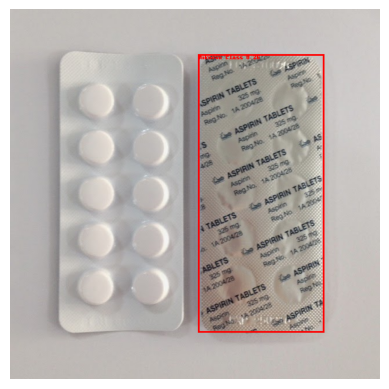

Unknown Class, Confidence: 0.26, Bbox: [325.4425048828125, 78.35313415527344, 543.0765380859375, 559.62109375]
Image saved with unknown class detection to: /content/unknown_class_images/photo-84.JPG


In [31]:
import os
import torch
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("/content/drive/MyDrive/drug/model.pt")

# Load image
img_path = '/content/photo-84.JPG'
image = Image.open(img_path)

# Perform prediction
results = model.predict(image)

# Prepare to save unknown class images
save_dir = '/content/unknown_class_images'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, os.path.basename(img_path))

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
unknown_class_detected = False

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        label = result.names[int(box.cls)]
        confidence = float(box.conf)  # Convert tensor to float
        if confidence <= 0.5:
            draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=3)
            draw.text((x1, y1), f"Unknown Class {confidence:.2f}", fill="red")
            unknown_class_detected = True
        else:
            draw.rectangle(((x1, y1), (x2, y2)), outline="blue", width=3)  # Draw with blue outline for high confidence
            draw.text((x1, y1), f"{label} {confidence:.2f}", fill="blue")

# Save image if unknown class was detected
if unknown_class_detected:
    image.save(save_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Print out the results
for result in results:
    for box in result.boxes:
        if float(box.conf) <= 0.5:
            print(f"Unknown Class, Confidence: {float(box.conf):.2f}, Bbox: {box.xyxy[0].tolist()}")
        else:
            print(f"Class: {result.names[int(box.cls)]}, Confidence: {float(box.conf):.2f}, Bbox: {box.xyxy[0].tolist()}")

if unknown_class_detected:
    print(f"Image saved with unknown class detection to: {save_path}")
else:
    print("No unknown classes detected.")

##image2vector

In [36]:
import numpy as np

image = '/content/unknown_class_images/bakamol-10pill.jpg'

def image2vector(image):
	v = image.reshape(image.shape[0] * image.shape[1] * image.shape[2], 1)
	return v
image = np.random.rand(3,3,2)
print("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[    0.82077]
 [    0.90884]
 [    0.81552]
 [    0.15941]
 [     0.6289]
 [    0.39843]
 [   0.062713]
 [    0.42403]
 [    0.25868]
 [    0.84904]
 [   0.033305]
 [    0.95898]
 [    0.35537]
 [    0.35671]
 [   0.016329]
 [    0.18523]
 [    0.40126]
 [    0.92929]]
